In [103]:
import matplotlib.pyplot as plt
import random
import numpy as np

## Mouvement Brownien

In [148]:
def brownian_motion(t_max, h):
    """
    Génère une trajectoire de mouvement brownien.

    param t_max: Temps maximum de la trajectoire.
    param h: Pas de temps.
    return: Un tuple de deux numpy arrays: temps et trajectoire correspondante.
    """
    n = int(t_max / h)
    increments = np.random.normal(0, np.sqrt(h), n)
    t = np.linspace(0, t_max, n)
    trajectory = np.cumsum(increments)

    return t, trajectory

# Parametres
t_max = 5.0
h = 0.01

In [149]:
# premier courbe 
t, trajectory = brownian_motion(t_max, h)

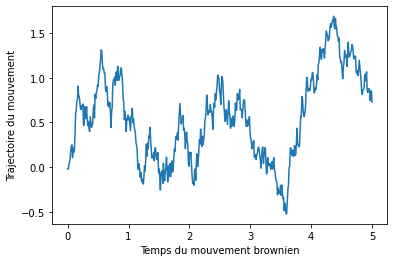

In [150]:
plt.plot(t, trajectory)
plt.xlabel("Temps du mouvement brownien")
plt.ylabel("Trajectoire du mouvement")
plt.show()

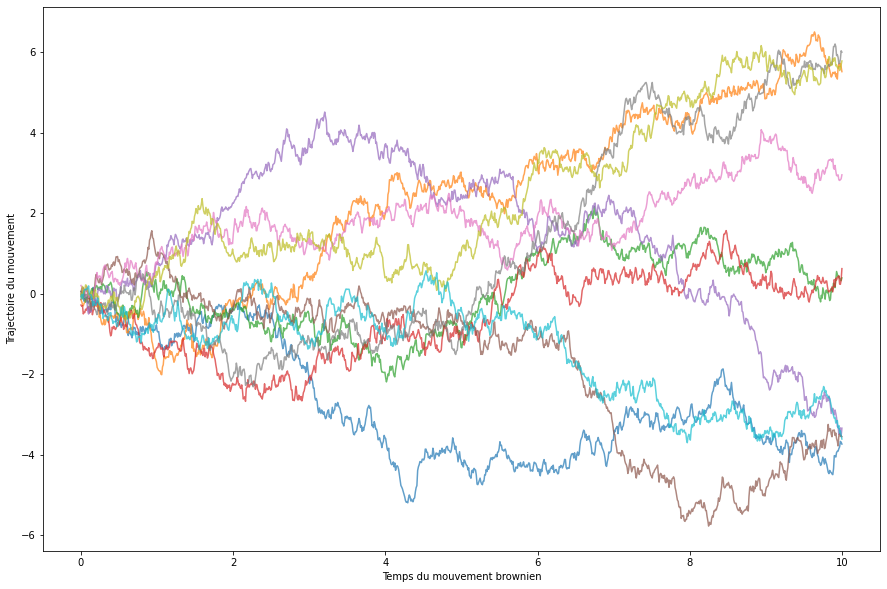

In [128]:
n_trajectories = 10

plt.figure(figsize= (15,10))
for i in range(n_trajectories):
    t, trajectory = brownian_motion(10, 0.01)
    plt.plot(t, trajectory, alpha = 0.7)
plt.xlabel("Temps du mouvement brownien")
plt.ylabel("Trajectoire du mouvement")
plt.show()


C:\Users\jhony\AppData\Local\Temp\ipykernel_4800\1931759374.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(t_continuous, up_curve, 'k--', label='$y = 1.96\\sqrt{t}$', color = 'r')
C:\Users\jhony\AppData\Local\Temp\ipykernel_4800\1931759374.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(t_continuous, below_curve, 'k--', label='$y = -1.96\\sqrt{t}$', color = 'r')


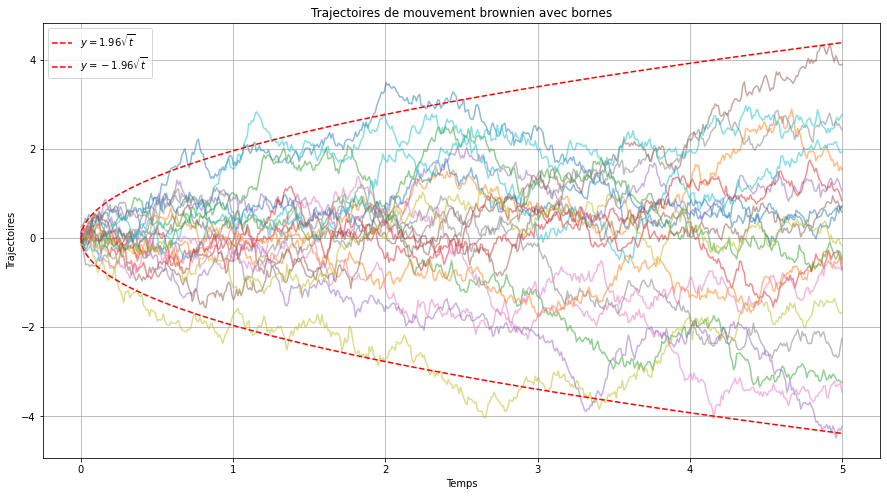

In [130]:
n_trajectories = 20

plt.figure(figsize=(15, 8))

for _ in range(n_trajectories):
    t, trajectory = brownian_motion(t_max, h)
    plt.plot(t, trajectory, alpha=0.5)

t_continuous = np.linspace(0, t_max, 500)
up_curve = 1.96 * np.sqrt(t_continuous)
below_curve = -1.96 * np.sqrt(t_continuous)

plt.plot(t_continuous, up_curve, 'k--', label='$y = 1.96\\sqrt{t}$', color = 'r')
plt.plot(t_continuous, below_curve, 'k--', label='$y = -1.96\\sqrt{t}$', color = 'r')

plt.title('Trajectoires de mouvement brownien avec bornes')
plt.xlabel('Temps')
plt.ylabel('Trajectoires')
plt.legend()
plt.grid(True)
plt.show()

In [133]:
# Vérification empirique du niveau de confiance 
# des intervalles au temps t*=10.

t_star = 10
n_trajectories = 10000  

y_upper = 1.96 * np.sqrt(t_star)
y_lower = -1.96 * np.sqrt(t_star)

counting = 0
for _ in range(n_trajectories):
    _, trajectory = brownian_motion(t_star, h)
    if y_lower <= trajectory[-1] <= y_upper:
        counting += 1

percentage_inside = (counting / n_trajectories) * 100
percentage_inside

95.05

## Black and Scholes

In [28]:
def black_and_scholes(S0, T, mu, sigma, dt):

    N = int(T / dt)  # Nombre de pas
    t = np.linspace(0, T, N)
    S = np.zeros(N)
    S[0] = S0

    for i in range(1, N):
        dW = np.random.normal(0, np.sqrt(dt))
        S[i] = S[i-1] + mu * S[i-1] * dt + sigma * S[i-1] * dW
    return t, S


In [32]:
black_and_scholes(100, 1, 0.05, 0.2, 0.1)

(array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 array([100.        ,  99.90569006, 103.81517942, 112.04599325,
        106.2505459 , 112.77614221, 114.23921903, 114.3049422 ,
        114.88689131, 119.16931608]))

In [29]:
# Simulation...
S0 = 100  
T = 1    
mu = 0.05 
sigma = 0.2  
dt1 = 0.1
dt2 = 0.01
n_simulations = 1000  

# Simulation avec dt = 0.1
final_values_dt1 = [black_and_scholes(S0, T, mu, sigma, dt1)[1][-1] for _ in range(n_simulations)]

# Simulation avec dt = 0.01
final_values_dt2 = [black_and_scholes(S0, T, mu, sigma, dt2)[1][-1] for _ in range(n_simulations)]


In [31]:
# Maintenant on doit calculer le intervalle de confiance empirquement.
# Dans le deux cas, on va calculer à 95%.

confidence_interval_95_dt1 = np.percentile(final_values_dt1, [2.5, 97.5])
confidence_interval_95_dt2 = np.percentile(final_values_dt2, [2.5, 97.5])

print(confidence_interval_95_dt1) 
print(confidence_interval_95_dt2)

[ 71.59178844 147.89717941]
[ 70.01986832 151.39032179]


In [47]:
# Mise à jour des paramètres pour la simulation à t* = 10
T_star = 10  
dt = 0.01    

final_values_10 = [black_and_scholes(S0, T_star, mu, sigma, dt)[1][-1] for _ in range(10)]
final_values_100 = [black_and_scholes(S0, T_star, mu, sigma, dt)[1][-1] for _ in range(100)]
final_values_1000 = [black_and_scholes(S0, T_star, mu, sigma, dt)[1][-1] for _ in range(1000)]
final_values_10000 = [black_and_scholes(S0, T_star, mu, sigma, dt)[1][-1] for _ in range(10000)]



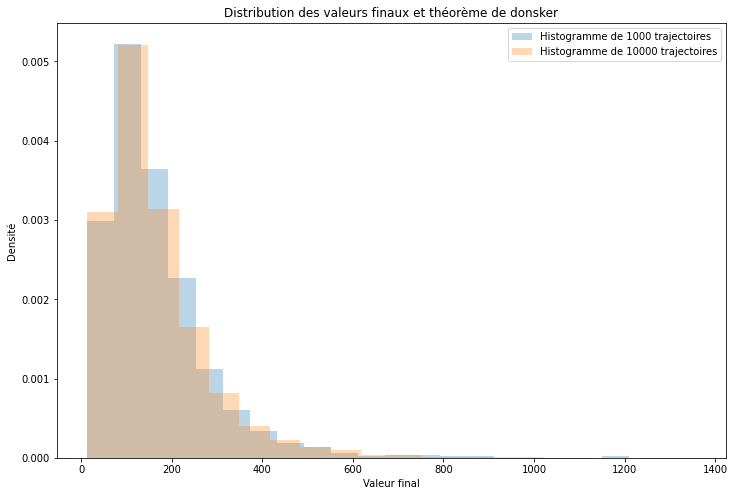

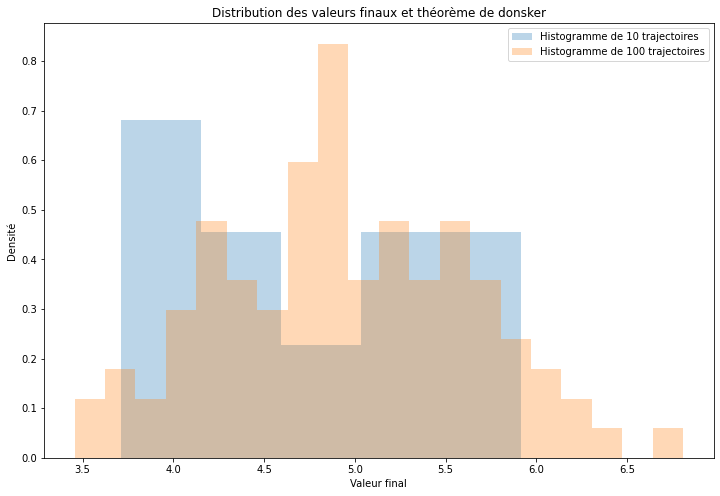

In [98]:
plt.figure(figsize=(12, 8))

#plt.hist(final_values_10, bins=5, density=True, alpha=0.3, label='Histogramme de 10 trajectoires')
#plt.hist(final_values_100, bins=20, density=True, alpha=0.3, label='Histogramme de 100 trajectoires')
plt.hist(final_values_1000, bins=20, density=True, alpha=0.3, label='Histogramme de 1000 trajectoires')
plt.hist(final_values_10000, bins=20, density=True, alpha=0.3, label='Histogramme de 10000 trajectoires')


plt.title('Distribution des valeurs finaux et théorème de donsker')
plt.xlabel('Valeur final')
plt.ylabel('Densité')
plt.legend()
plt.show()



plt.figure(figsize=(12, 8))

plt.hist(final_values_10, bins=5, density=True, alpha=0.3, label='Histogramme de 10 trajectoires')
plt.hist(final_values_100, bins=20, density=True, alpha=0.3, label='Histogramme de 100 trajectoires')
#plt.hist(final_values_1000, bins=20, density=True, alpha=0.3, label='Histogramme de 1000 trajectoires')
#plt.hist(final_values_10000, bins=20, density=True, alpha=0.3, label='Histogramme de 10000 trajectoires')


plt.title('Distribution des valeurs finaux et théorème de donsker')
plt.xlabel('Valeur final')
plt.ylabel('Densité')
plt.legend()
plt.show()